Not sure where this is going anymore

Wheel torque is equivalent to the gear ratio times the motors torque.

T1 = T0 * Rg

Gear Ratio is Rg = R0/R1 where R0 is input radius and R1 is output radius>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def wheel_t_from_ratio(R0, R1, T0):
    """
        Calculate the wheel torque.
        PARAMS: 
            R0: radius of input sprocket
            R1: radius of output sprocket
            T0: input torque
        RETURNS:
            wheel torque
    """
    return T0 * (R1 / R0)

def wheel_v_from_ratio(R0, R1, T0, Rw):
    """
        Calculate the wheel speed.
        PARAMS: 
            R0: radius of input sprocket
            R1: radius of output sprocket
            T0: input torque
            Rw: radius of wheel
        RETURNS:
            wheel velocity wrt ground
    """
    return T0 * (R0 / R1) * 2 * np.pi * Rw

def dTdR1(R0, T0):
    return T0 / R0

def dVdR1(R0, R1, T0, Rw):
    return T0 * R0 * 2 * np.pi * Rw * np.log(R1)


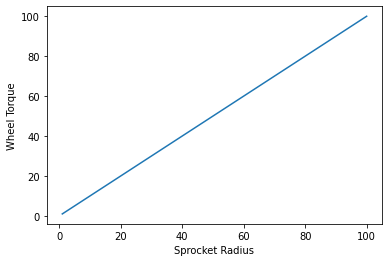

In [13]:
def display_wheel_t_from_ratio(R0, T0, R1):
    y = T0 * (R1 / R0)
    plt.plot(R1, y)
    plt.xlabel('Sprocket Radius')
    plt.ylabel('Wheel Torque')
    plt.show()
    
display_wheel_torque_from_ratio(1, 1, np.linspace(1,100))

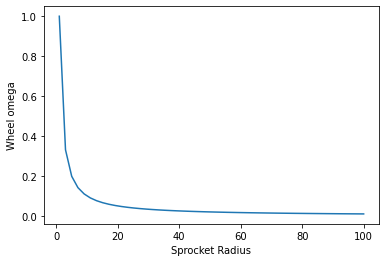

In [15]:
def display_wheel_w_from_ratio(R0, T0, R1):
    y = T0 * (R0 / R1)
    plt.plot(R1, y)
    plt.xlabel('Sprocket Radius')
    plt.ylabel('Wheel omega')
    plt.show()
    
display_wheel_w_from_ratio(1, 1, np.linspace(1,100))

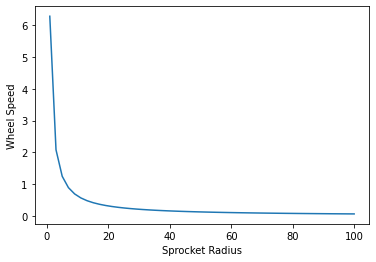

In [20]:
def display_wheel_v_from_ratio(R0, T0, R1, Rw):
    y = (T0 * R0 / R1) * 2 * np.pi * Rw
    plt.plot(R1, y)
    plt.xlabel('Sprocket Radius')
    plt.ylabel('Wheel Speed')
    plt.show()
    
display_wheel_v_from_ratio(1, 1, np.linspace(1,100), 1)

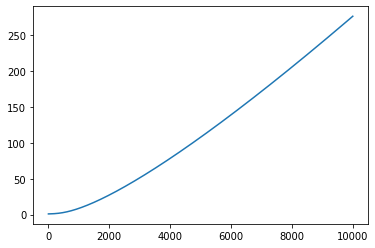

In [42]:
"""
y1 = T0 * (R1 / R0)
y2 = T0 * (R0 / R1) * 2PI * Rw

Y = a * y1 / b * y2

dY = a * dy1 + b * dy2

"""

def model(R0, R1, T0, Rw, a, b):
    return (a * wheel_t_from_ratio(R0, R1, T0)) + (b * wheel_v_from_ratio(R0, R1, T0, Rw))

def deltamodel(R0, R1, T0, Rw, a, b):
    return (a * dTdR1(R0, T0)) + (b * dVdR1(R0, R1, T0, Rw))

def spin(R0, R1, T0, Rw, a, b, epochs, alpha=0.01):
    loss = []
    for i in range(epochs):
        r = deltamodel(R0, R1, T0, Rw, a, b)
        R1 += alpha * r    # model DY/DR1 = 1
        loss.append(R1)
        
    plt.plot([i for i in range(epochs)], loss)
    plt.show()
    
spin(1, 1, 1, 1, 0.1, 0.1, 10000)

<ipython-input-39-5715a71b4803>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot([i for i in range(1000)], [np.log(i) for i in range(1000)])


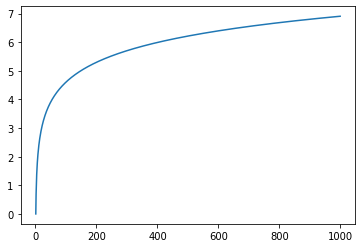

In [39]:
plt.plot([i for i in range(1000)], [np.log(i) for i in range(1000)])